In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\programming_languages\nearest-earth-objects(1910-2024).csv')

In [3]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [4]:
df.drop(['neo_id','name','orbiting_body'], axis=1, inplace=True)

In [5]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [6]:
df.dtypes

absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338171 non-null  float64
 1   estimated_diameter_min  338171 non-null  float64
 2   estimated_diameter_max  338171 non-null  float64
 3   relative_velocity       338199 non-null  float64
 4   miss_distance           338199 non-null  float64
 5   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 13.2 MB


In [8]:
df.duplicated().sum()

5

In [9]:
df.drop_duplicates(inplace=True)
df

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [10]:
df.shape

(338194, 6)

In [11]:
df.isnull().sum()

absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [12]:
def fill_null_value(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0], inplace=True)
    else:
      df[col].fillna(df[col].median(), inplace=True)

  return df

In [13]:
df = fill_null_value(df)

In [14]:
df.isnull().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338194 entries, 0 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338194 non-null  float64
 1   estimated_diameter_min  338194 non-null  float64
 2   estimated_diameter_max  338194 non-null  float64
 3   relative_velocity       338194 non-null  float64
 4   miss_distance           338194 non-null  float64
 5   is_hazardous            338194 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 15.8 MB


In [16]:
df.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338194.000000,338194.000000,338194.000000,338194.000000,3.381940e+05
mean,22.932574,0.157801,0.352853,51060.113126,4.153521e+07
std,2.911076,0.313873,0.701842,26399.035507,2.077401e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30711.844826,2.494480e+07
50%,22.800000,0.073207,0.163697,47560.146859,4.332674e+07
75%,25.100000,0.189041,0.422708,66672.950081,5.933949e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [17]:
print(df)

        absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0     

In [18]:
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

absolute_magnitude : 1778
absolute_magnitude
24.4    2208
26.1    2088
24.6    2083
25.5    2048
24.8    2038
Name: count, dtype: int64

********************

estimated_diameter_min : 1778
estimated_diameter_min
0.035039    2208
0.016016    2088
0.031956    2083
0.021113    2048
0.029144    2038
Name: count, dtype: int64

********************

estimated_diameter_max : 1778
estimated_diameter_max
0.078350    2208
0.035813    2088
0.071456    2083
0.047211    2048
0.065169    2038
Name: count, dtype: int64

********************

relative_velocity : 338189
relative_velocity
58574.370714    2
51964.058408    2
57139.219620    2
53011.456338    2
53405.536383    2
Name: count, dtype: int64

********************

miss_distance : 337826
miss_distance
1.920966e+07    2
7.132691e+07    2
3.631275e+07    2
1.793801e+07    2
1.758044e+06    2
Name: count, dtype: int64

********************

is_hazardous : 2
is_hazardous
False    295032
True      43162
Name: count, dtype: int64

******************

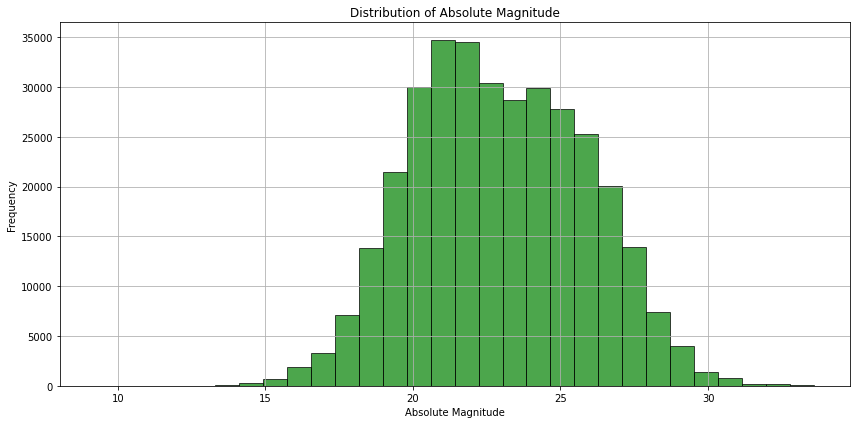

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(df['absolute_magnitude'], bins=30, color='g', edgecolor='k', alpha=0.7)
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

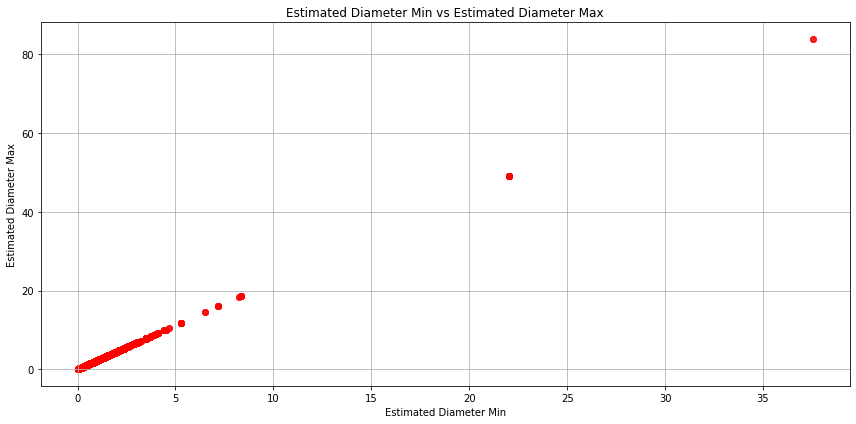

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df['estimated_diameter_min'], df['estimated_diameter_max'], alpha=0.5, color='r')
plt.title('Estimated Diameter Min vs Estimated Diameter Max')
plt.xlabel('Estimated Diameter Min')
plt.ylabel('Estimated Diameter Max')
plt.grid(True)
plt.tight_layout()
plt.show()

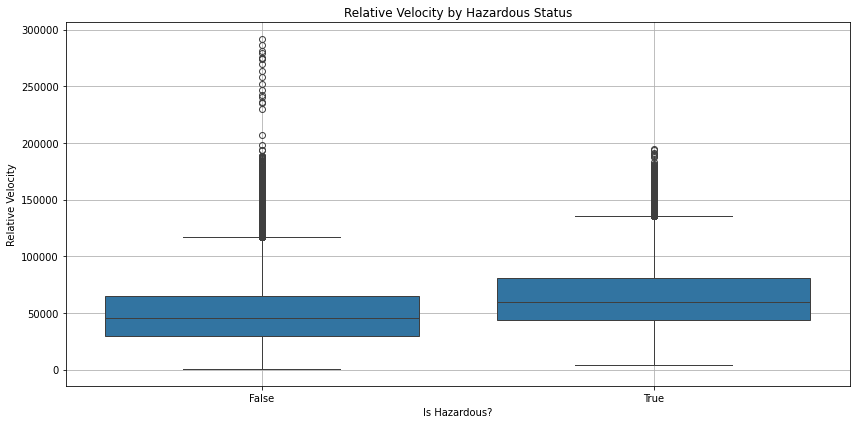

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['is_hazardous'], y=df['relative_velocity'])
plt.title('Relative Velocity by Hazardous Status')
plt.xlabel('Is Hazardous?')
plt.ylabel('Relative Velocity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
X

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07
...,...,...,...,...,...
338194,28.580,0.005112,0.011430,56646.985988,6.406548e+07
338195,28.690,0.004859,0.010865,21130.768947,2.948883e+07
338196,21.919,0.109839,0.245607,11832.041031,5.346078e+07
338197,23.887,0.044377,0.099229,56198.382733,5.184742e+06


In [24]:
y

0         False
1          True
2         False
3         False
4         False
          ...  
338194    False
338195    False
338196    False
338197    False
338198    False
Name: is_hazardous, Length: 338194, dtype: bool

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Applying LogisticRegression Model 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
LogisticRegressionModel = LogisticRegression(solver='sag',C=1,random_state=33,max_iter=200)

In [30]:
LogisticRegressionModel.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=200, random_state=33, solver='sag')

In [31]:
y_pred = LogisticRegressionModel.predict(X_test_scaled)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, zero_one_loss 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8706071940744246
Confusion Matrix:
 [[58299   694]
 [ 8058   588]]


In [33]:
print('LogisticRegressionModel Train Score is: ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is: ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Train Score is:  0.8723143168671804
LogisticRegressionModel Test Score is:  0.87211519981076


E:\programming_languages\programs\anacoda\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
E:\programming_languages\programs\anacoda\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


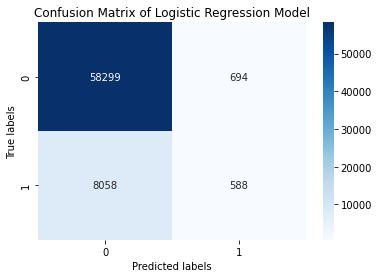

In [34]:
cm = confusion_matrix(y_test, y_pred)
photo = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
photo.set_xlabel('Predicted labels')
photo.set_ylabel('True labels')
photo.set_title('Confusion Matrix of Logistic Regression Model')
plt.show()
photo.figure.savefig('logistic_regression_confusion_matrix.png')

In [35]:
AccScore = accuracy_score(y_test, y_pred) 
print('Accuracy Score is: ', AccScore)

Accuracy Score is:  0.8706071940744246


In [36]:
ZeroOneLossValue = zero_one_loss(y_test, y_pred, normalize=False) 
print('Zero One Loss Value: ', ZeroOneLossValue)

Zero One Loss Value:  8752


# Applying Decision Tree Model

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [38]:
y_pred = model.predict(X_test)
y_pred_prob =model .predict_proba(X_test)

In [39]:
y_pred =model .predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58713   280]
 [ 7525  1121]]


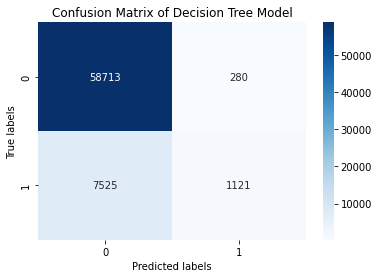

In [40]:
photo = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
photo.set_xlabel('Predicted labels')
photo.set_ylabel('True labels')
photo.set_title('Confusion Matrix of Decision Tree Model')
plt.show()
photo.figure.savefig('decision_tree_confusion_matrix.png')

In [41]:
print('Decision Tree Model Train Score is: ' ,model.score(X_train, y_train))
print('Decision Tree Model Test Score is: ' , model.score(X_test, y_test))

Decision Tree Model Train Score is:  0.8843229657555765
Decision Tree Model Test Score is:  0.8846079924304026


In [42]:
results = accuracy_score(y_test, y_pred) 
print('Accuracy Score is: ', results)

Accuracy Score is:  0.8846079924304026


In [43]:
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value: ', ZeroOneLossValue)

Zero One Loss Value:  7805


# Applying Random Forest  Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve

In [46]:
y_prd = model.predict(X_test)
balance_acc = balanced_accuracy_score(y_test, y_pred)
print('Balanced Accuracy:', balance_acc)

Balanced Accuracy: 0.5624545030550698


In [47]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [48]:
undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [49]:
X = df.drop(columns=['is_hazardous'])
y = df['is_hazardous']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [50]:
target_column = 'is_hazardous'

In [51]:
X = df.drop(columns=[target_column])
y = df[target_column]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [54]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.94      0.97      0.95     58993
        True       0.72      0.59      0.65      8646

    accuracy                           0.92     67639
   macro avg       0.83      0.78      0.80     67639
weighted avg       0.91      0.92      0.91     67639



AUC-ROC: 0.9501646864566622


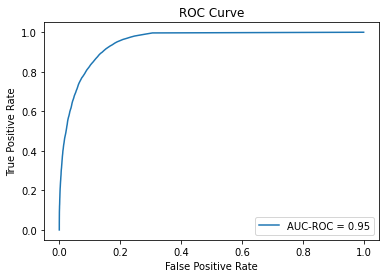

In [56]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, y_prob_rf)
print("AUC-ROC:", auc_roc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label=f"AUC-ROC = {auc_roc:.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [57]:
print('Random Forest model accuracy on test data:', accuracy_score(y_test, y_pred))
print('Classification report for the Random Forest model:\n', classification_report(y_test, y_pred))

Random Forest model accuracy on test data: 0.8846079924304026
Classification report for the Random Forest model:
               precision    recall  f1-score   support

       False       0.89      1.00      0.94     58993
        True       0.80      0.13      0.22      8646

    accuracy                           0.88     67639
   macro avg       0.84      0.56      0.58     67639
weighted avg       0.88      0.88      0.85     67639



In [58]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[57042  1951]
 [ 3576  5070]]


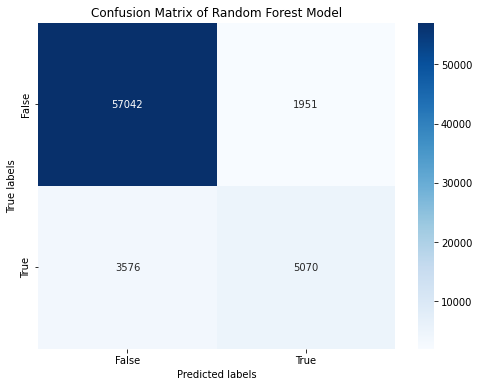

In [59]:
plt.figure(figsize=(8, 6))
photo = sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
photo.set_xlabel('Predicted labels')
photo.set_ylabel('True labels')
photo.set_title('Confusion Matrix of Random Forest Model')
plt.show()
photo.figure.savefig('random_forest_confusion_matrix.png')

In [60]:
ran = accuracy_score(y_test, y_pred_rf) 
print('Accuracy Score is: ', ran)

Accuracy Score is:  0.9182867872085632


In [61]:
ZeroOneLossnow = zero_one_loss(y_test, y_pred_rf, normalize=False)
print('Zero One Loss Value: ', ZeroOneLossnow)

Zero One Loss Value:  5527


In [62]:
print("Random Forest Accuracy: ", ran )   
print("Logistic Regression Accuracy: ", AccScore )
print("Decision Tree Accuracy:", results )

Random Forest Accuracy:  0.9182867872085632
Logistic Regression Accuracy:  0.8706071940744246
Decision Tree Accuracy: 0.8846079924304026
